# ILLUSION CODING

## HORIZONTALLY SHIFTED PATTERNS

Import in required libraries:
Numpy: Image array management
Matplotlib: Plotting
Scikit Image: Displaying the Image
Matplotlib inline to display in a notebook
Debug values to display debug outputs

In [236]:
import numpy as np
import matplotlib.pyplot as plt
import skimage, skimage.io
%matplotlib inline

DEBUG = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]

Set the DPI of the image plot(MAX 300)

In [237]:
plt.rcParams['figure.dpi'] = 300

Helper function to create a blank test image of variable size and color

In [238]:
def blank_image(shape=(640, 640, 4), rgba=(255, 255, 255, 0)):
    return np.ones(shape, dtype=np.float64) * np.array(rgba) / 255.

Helper function to display an image.

In [239]:
def display(img, colorbar=False):
    plt.figure(figsize=(10, 10))
    if len(img.shape) == 2:
        i = skimage.io.imshow(img, cmap='gray')
    else:
        i = skimage.io.imshow(img)
    if colorbar:
        plt.colorbar(i, shrink=0.5, label='depth')
    plt.tight_layout()

DEBUG 0: Tests displaying the test image.

In [240]:
if DEBUG[0] == 1 : display(blank_image())

## TILING

DEBUG 1: Use a sample icon with transparency to test functionality.

In [241]:
skull = skimage.io.imread('skull.png', plugin=None)
if DEBUG[1] == 1 : display(skull)

Insert a pattern onto a background, at given location. Returns new image.

In [242]:
def stamp_image(background_img, pattern, location):
    img = background_img.copy()
    r0, c0 = location
    r1, c1 = r0 + pattern.shape[0], c0 + pattern.shape[1]
    if r1 < background_img.shape[0] and c1 < background_img.shape[1]:
        img[r0:r1, c0:c1, :] = skimage.img_as_float(pattern)
    return img

DEBUG 2: Tests creating a test image with a repeating pattern. (background, pattern, location(x,y))

In [243]:
test_img = stamp_image(blank_image(), skull, (10, 20))
if DEBUG[2] == 1 : display(test_img)

Function to tile a pattern on a background image, repeatedly with a given shift.

In [244]:
def tile_image_horizontally(background_img, pattern, start_location, repetitions, shift):
    img = background_img.copy()
    for i in range(repetitions):
        r, c = start_location
        c += i * shift
        img = stamp_image(img, pattern, location=(r, c))
    return img

DEBUG 3: Tests implementing tile_image_horizontally function
(background image, image to tile, (x,y) of start, how many times the pattern will repeat, how much to shift the pattern by)

In [245]:
test_img = tile_image_horizontally(blank_image(), skull, (10, 20), 3, 128)
if DEBUG[3] == 1 : display(test_img)

DEBUG 4: Test the tile_image_horizontally function for multiple rows

In [246]:
img = blank_image(shape=(450, 800, 4))
img = tile_image_horizontally(img, skull, (10, 10), 6, shift=60)
img = tile_image_horizontally(img, skull, (10 + 50, 10), 5, shift=50)
img = tile_image_horizontally(img, skull, (10 + 2 * 100, 10), 5, shift=40)
if DEBUG[4] == 1 : display(img)

## DEPTH MAP BASED STEREOGRAMS

Creates a pattern from gray values.

In [247]:
def make_pattern(shape=(16, 16), levels=64):
    return np.random.randint(0, levels - 1, shape) / levels

DEBUG 5: Tests making a pattern

In [248]:
pattern = make_pattern(shape=(128, 64))
if DEBUG[5] == 1 : display(pattern)

Creates a circular depthmap, centered on the image.

In [249]:
def create_circular_depthmap(shape=(600, 800), center=None, radius=100):
    depthmap = np.zeros(shape, dtype=np.float64)
    r = np.arange(depthmap.shape[0])
    c = np.arange(depthmap.shape[1])
    R, C = np.meshgrid(r, c, indexing='ij')
    if center is None:
        center = np.array([r.max() / 2, c.max() / 2])
    d = np.sqrt((R - center[0])**2 + (C - center[1])**2)
    depthmap += (d < radius)
    return depthmap    

DEBUG 6: Tests the circular depthmap function

In [250]:
depthmap = create_circular_depthmap(radius=150)
if DEBUG[6] == 1 : display(depthmap, colorbar=True)

Normalizes values of depthmap to [0, 1] range.

In [251]:
def normalize(depthmap):
    if depthmap.max() > depthmap.min():
        return (depthmap - depthmap.min()) / (depthmap.max() - depthmap.min())
    else:
        return depthmap

Creates an autostereogram from depthmap and pattern.

In [252]:
def make_autostereogram(depthmap, pattern, shift_amplitude=0.1, invert=False):
    depthmap = normalize(depthmap)
    if invert:
        depthmap = 1 - depthmap
    autostereogram = np.zeros_like(depthmap, dtype=pattern.dtype)
    for x in np.arange(autostereogram.shape[0]):
        for y in np.arange(autostereogram.shape[1]):
            if y < pattern.shape[1]:
                autostereogram[x, y] = pattern[x % pattern.shape[0], y]
            else:
                shift = int(depthmap[x, y] * shift_amplitude * pattern.shape[1])
                autostereogram[x, y] = autostereogram[x, y - pattern.shape[1] + shift]
    return autostereogram

DEBUG 7: Tests the algorithm

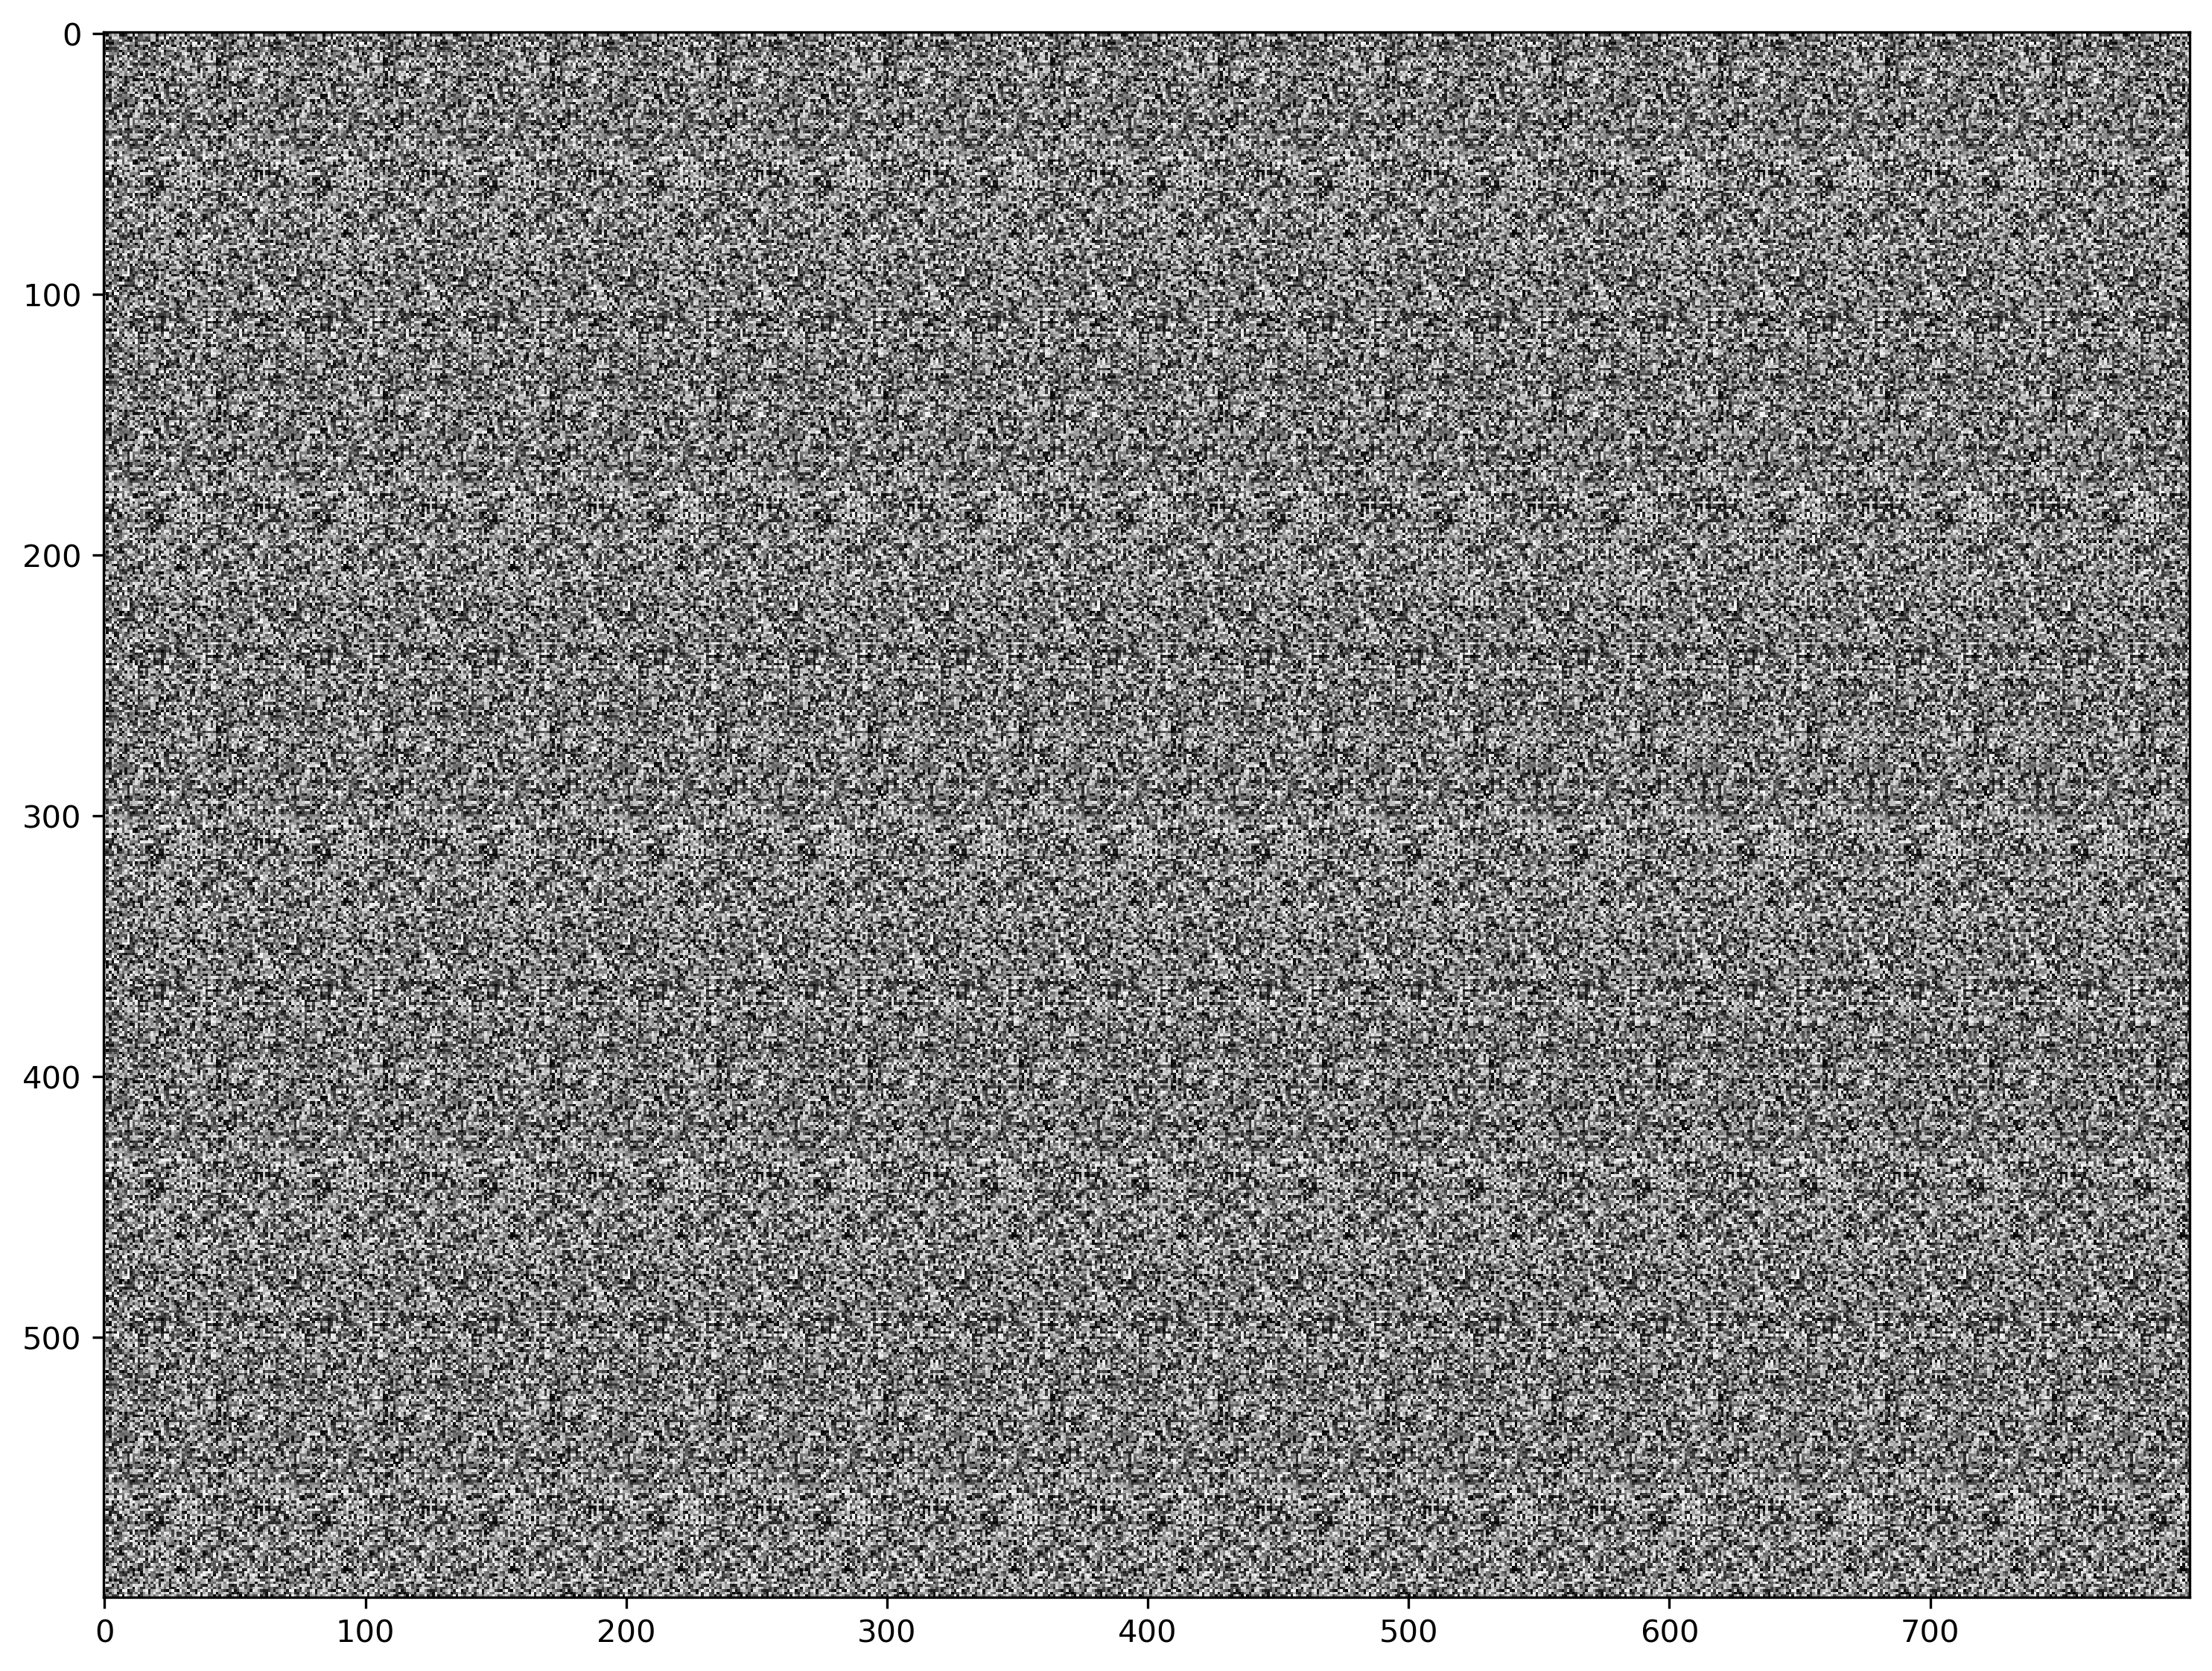

In [253]:
autostereogram = make_autostereogram(depthmap, pattern)
if DEBUG[7] == 1 : display(autostereogram)

DEBUG 8: Test the algorithm inverted

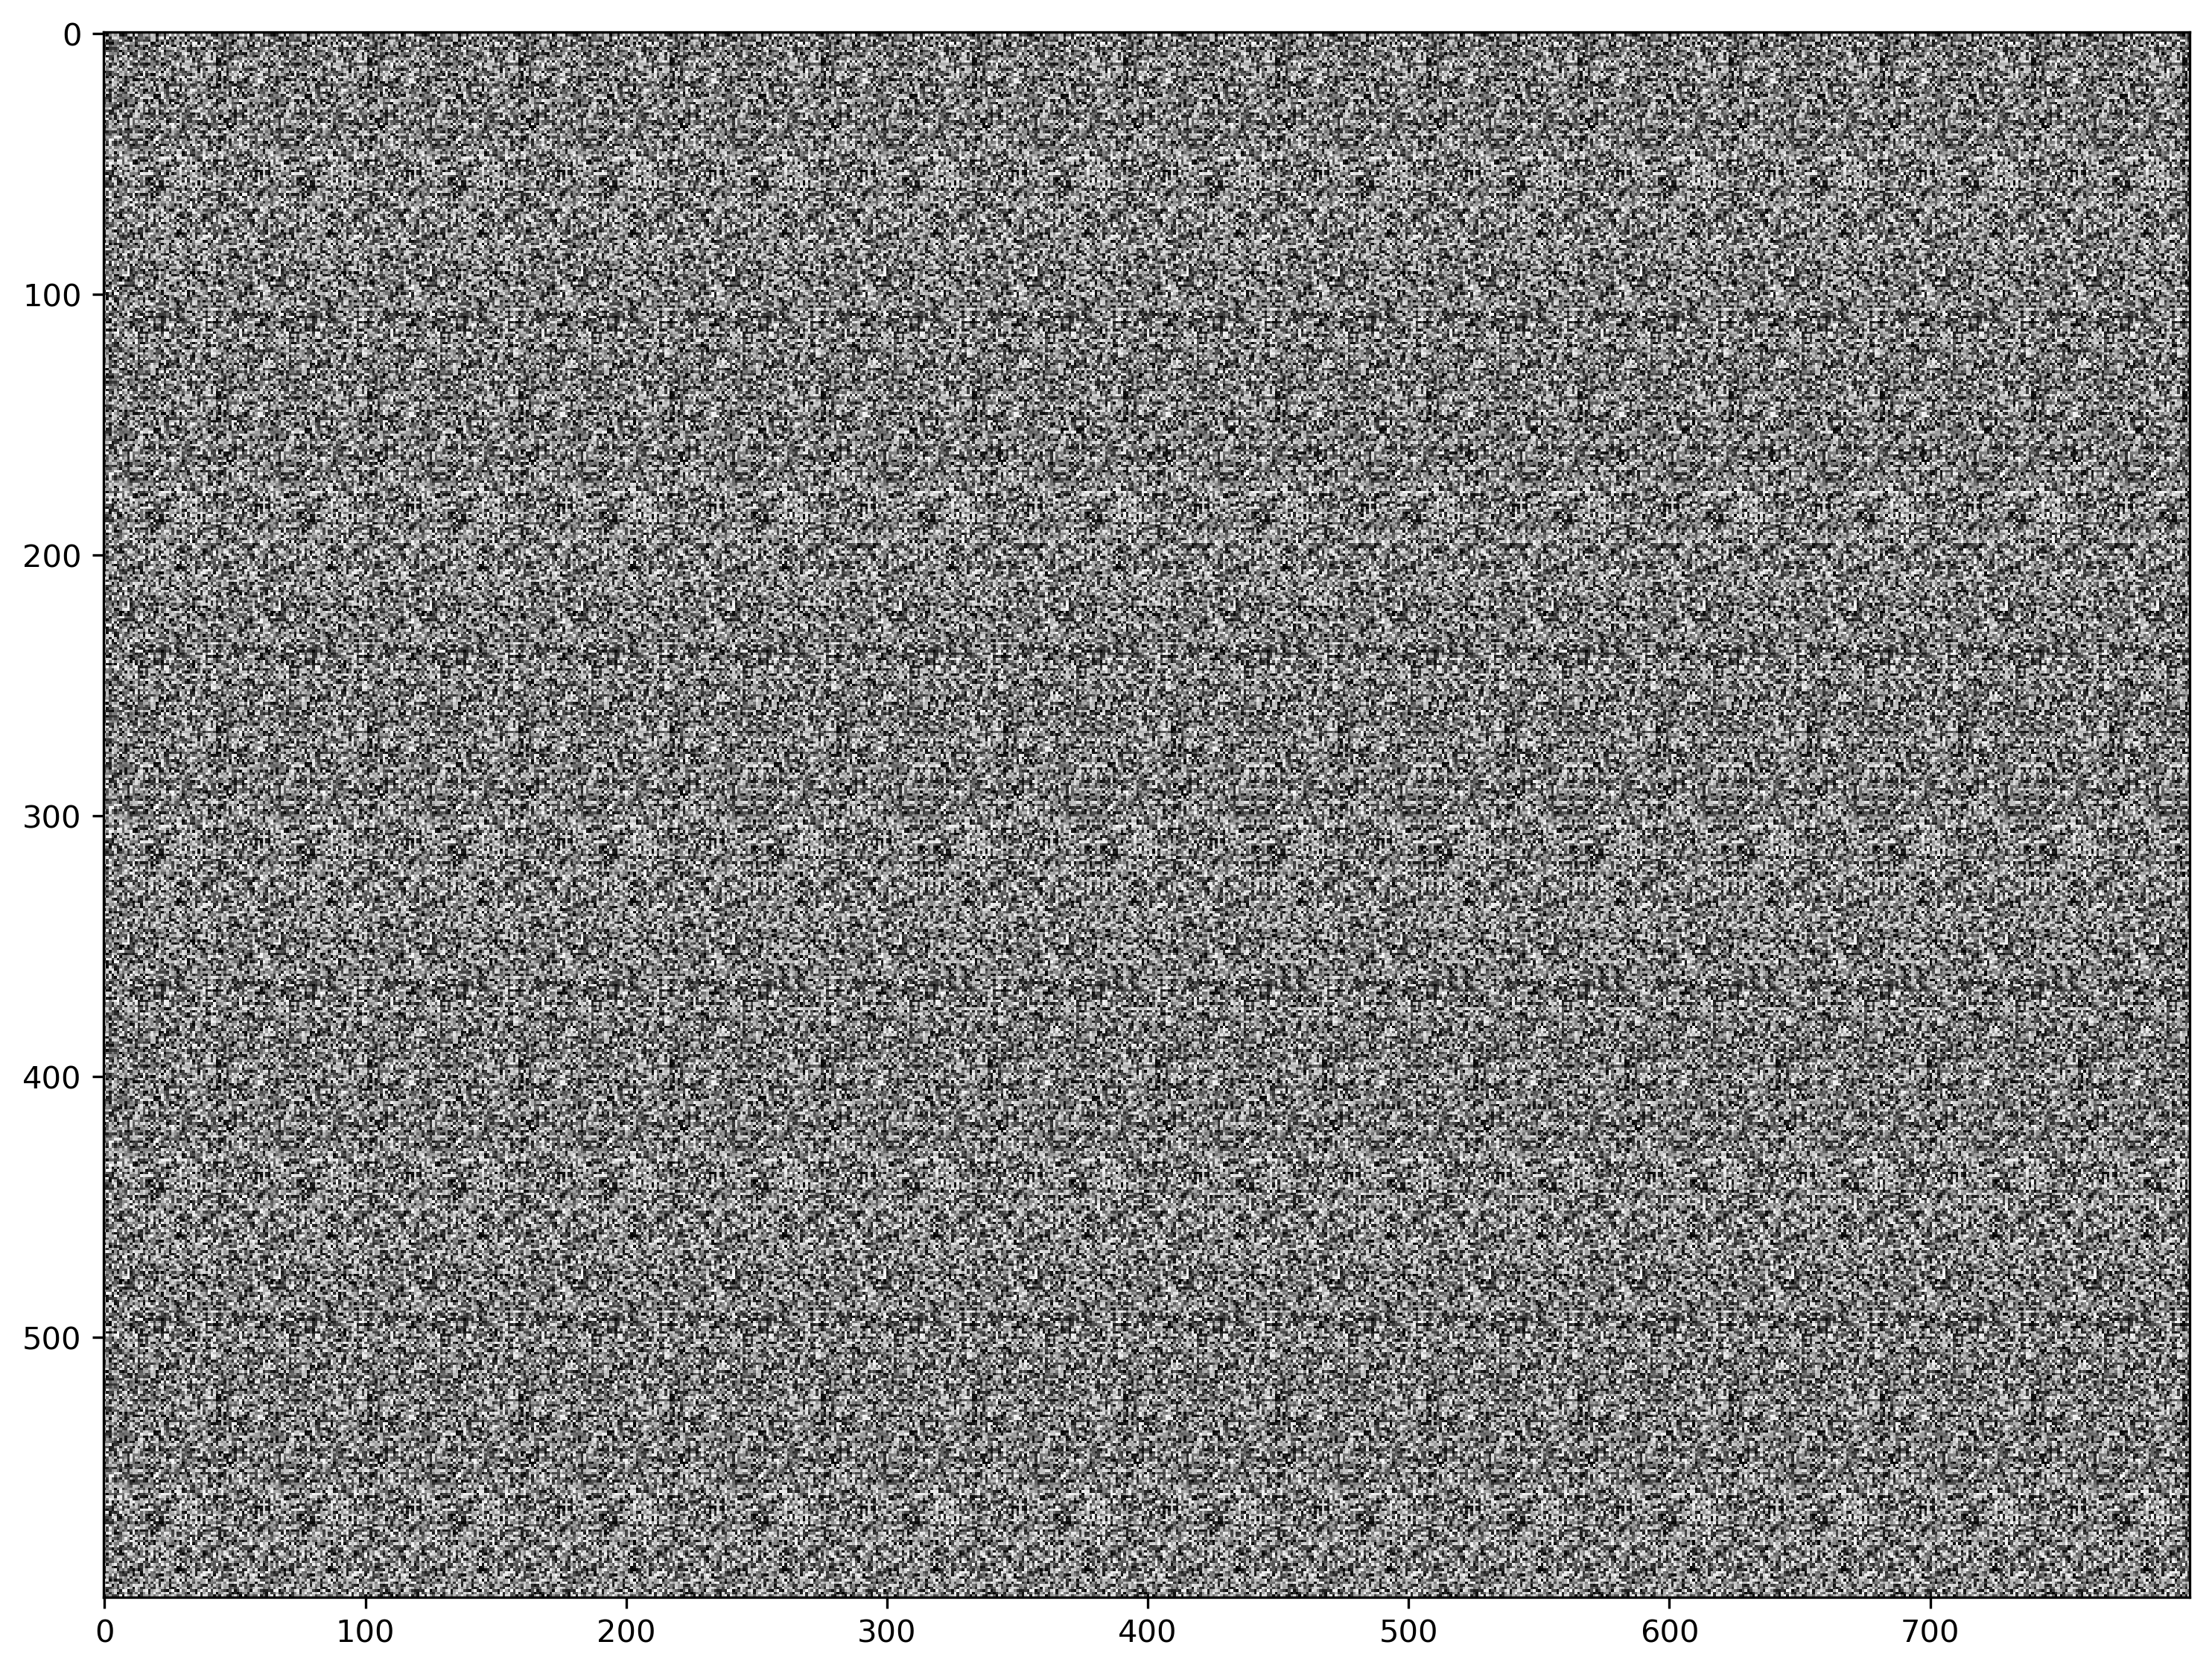

In [254]:
autostereogram = make_autostereogram(depthmap, pattern, invert=True)
if DEBUG[8] == 1 : display(autostereogram)

DEBUG 9: Combining depthmaps

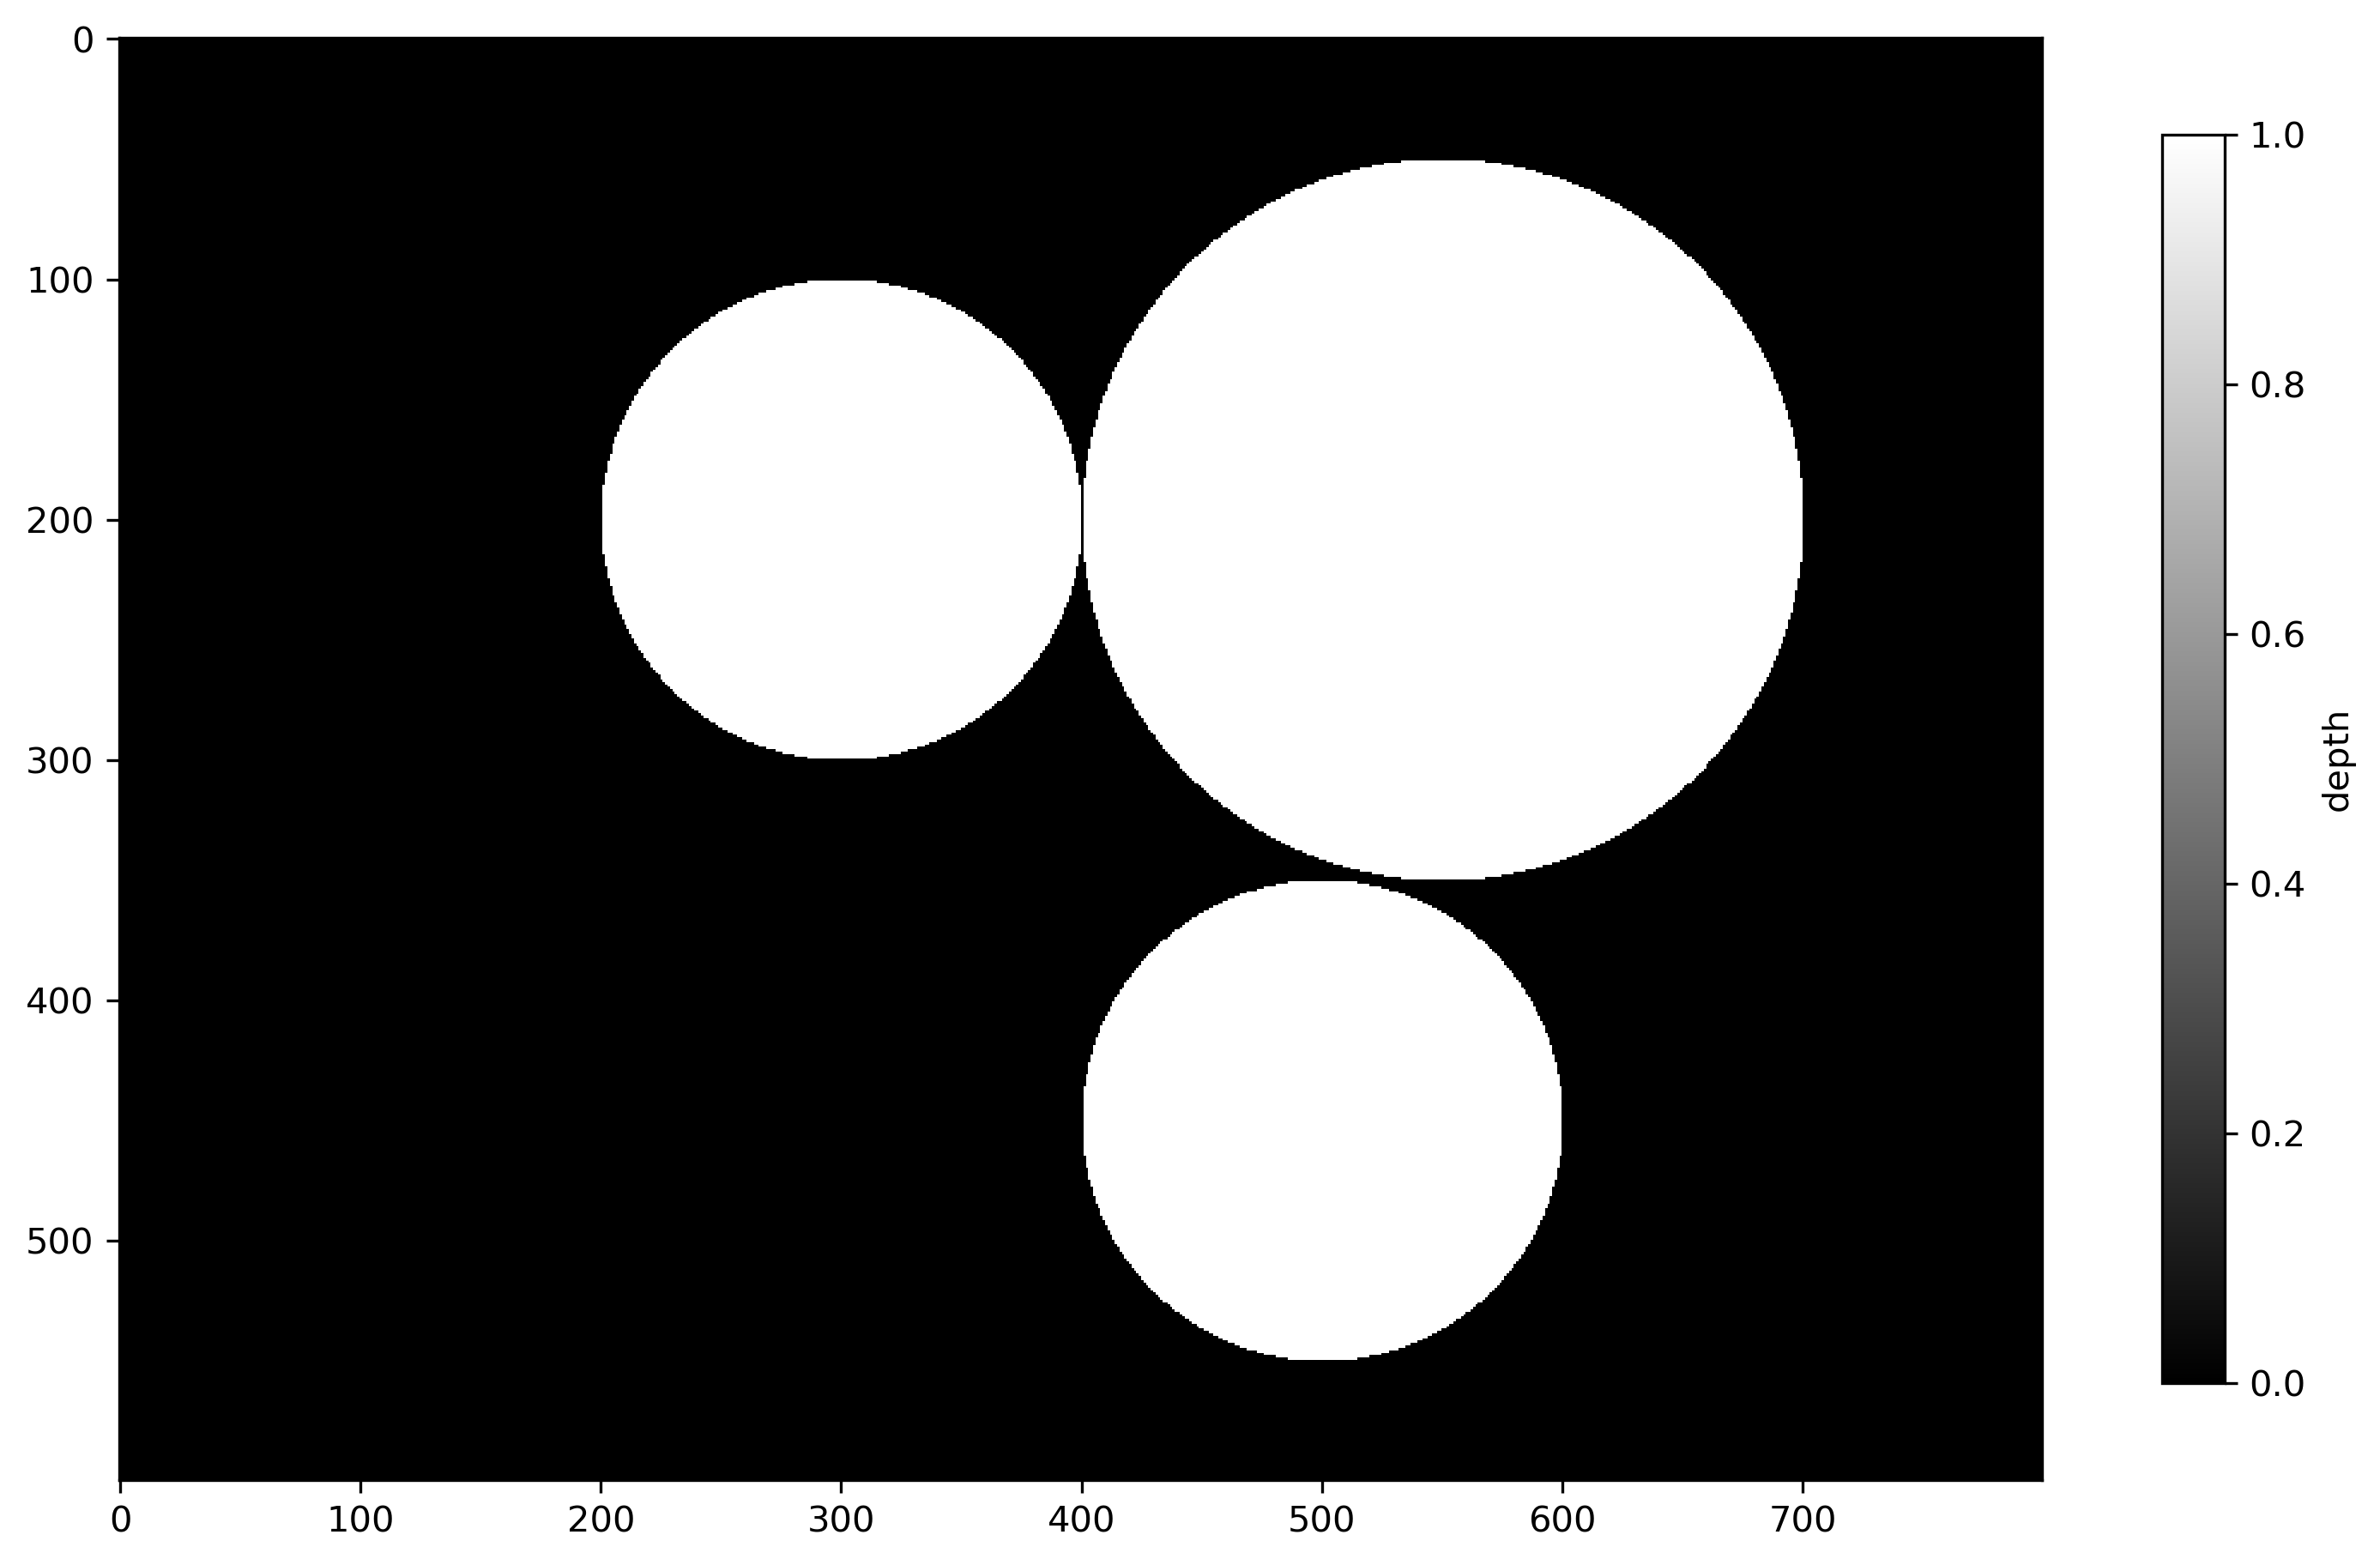

In [255]:
depthmap = create_circular_depthmap(center=(200, 300), radius=100) + \
           create_circular_depthmap(center=(450, 500), radius=100) + \
           create_circular_depthmap(center=(200, 550), radius=150)
# depthmap = skimage.io.imread('struna_depth.png', plugin=None)

if DEBUG[9] == 1 : display(depthmap, colorbar=True)

DEBUG 10: Use new deph map in Stereogram

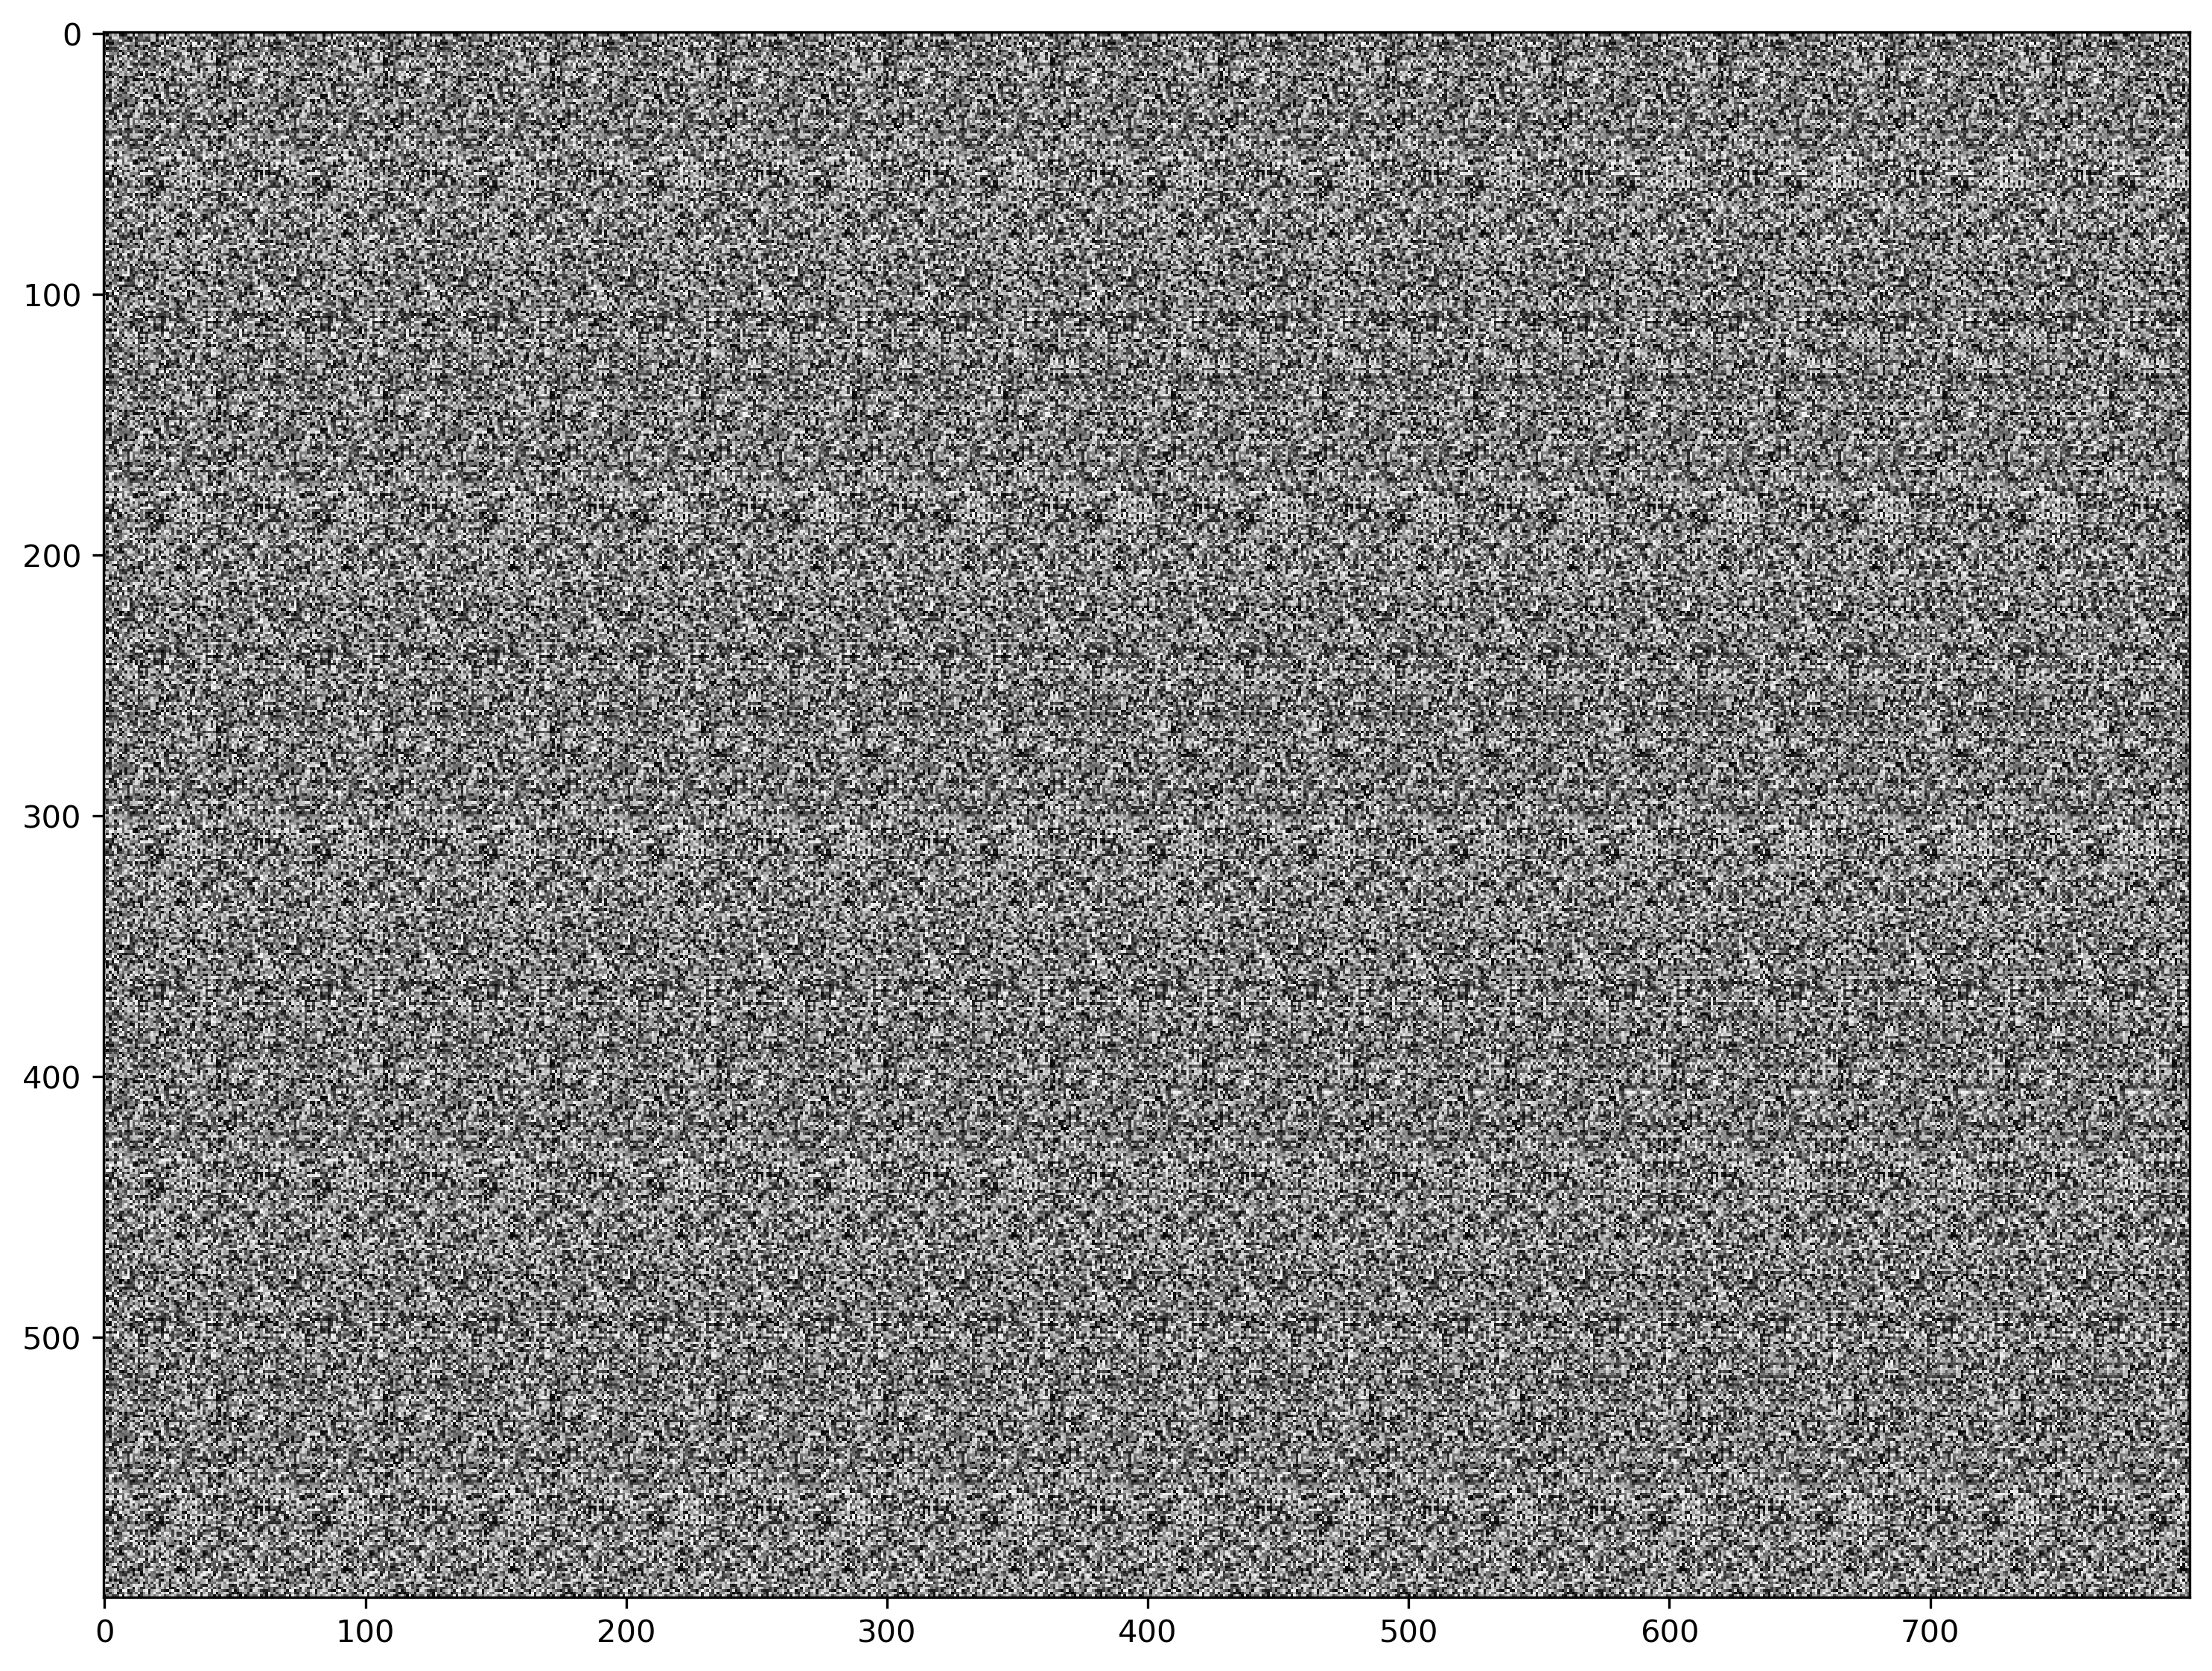

In [256]:
autostereogram = make_autostereogram(depthmap, pattern)
if DEBUG[10] == 1 : display(autostereogram)